In [63]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [168]:
#initialize rate constant values
kd = 1
kp = 10
kf = 10
kr = 1

#initialize population values
Ca = 0
Cga = 1
Cga_star = 0

Cb = 0
Cgb = 1
Cgb_star = 0

#calculate initial rates
u1 = kd * Ca #A death
u2 = kp * Cga #A birth
u3 = kf * Cga * Cb #ga deactivation
u4 = kr * Cga_star #ga activation

u5 = kd * Cb #B death
u6 = kp * Cgb #B birth
u7 = kf * Cgb * Ca #gB deactivation
u8 = kr * Cgb_star #gB activation

usum = u1 + u2 + u3 + u4 + u5 + u6 + u7 + u8

#initialize lists
pop_lst = [Ca, Cga, Cga_star, Cb, Cgb, Cgb_star]
prob_lst = [u1/usum, u2/usum, u3/usum, u4/usum, u5/usum, u6/usum, u7/usum, u8/usum, 0]

#initialize operator array, where each row is an operation to be "executed" on the population list
op_lst = [[-1, 0, 0, 0, 0, 0], #A death
           [1, 0, 0, 0, 0, 0], #A birth
           [0, -1, 1, -1, 0, 0], #ga deactivation
          [0, 1, -1, 1, 0, 0], #ga activation
           [0, 0, 0, -1, 0, 0], #B death
           [0, 0, 0, 1, 0, 0], #B birth
           [-1, 0, 0, 0, -1, 1], #gb deactivation
          [1, 0, 0, 0, 1, -1], #gb activation
           [1, 1, -1, 1, 1, -1]] #constraint

#takes an operation and a pop list and returns the updated pop list
def apply_op(pop_lst, operator):
    for i in range(len(pop_lst)):
        pop_lst[i] += operator[i]
    return pop_lst

#20k iterations has given good results on this scale
iterations = 20000
time = 0

time_lst = [0]
state_lst = np.array([[0, 0, 0, 0, 0, 0]])

In [169]:
for i in range(iterations):
    #if both genes are inactive, predefine the reaction to be activation of both genes
    #to meet the constrations of the model
    if pop_lst[2] == 1 and pop_lst[5] == 1:
        operator = op_lst[8]
    else:
        #sample event using probabilities = prob_lst
        operator_id = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8], p=prob_lst)
        operator = op_lst[operator_id]
    
    #update pop_lst
    pop_lst = apply_op(pop_lst, operator)
    
    #sample time to next event
    H = np.random.exponential(1/usum)
    time += H
    
    #update all rates, rate sum, and probability list
    #this could probably be made more efficient with conditionals, but also unreadable
    u1 = kd * pop_lst[0]
    u2 = kp * pop_lst[1]
    u3 = kf * pop_lst[1] * pop_lst[3]
    u4 = kr * pop_lst[2]

    u5 = kd * pop_lst[3]
    u6 = kp * pop_lst[4]
    u7 = kf * pop_lst[4] * pop_lst[0]
    u8 = kr * pop_lst[5]
    usum = u1 + u2 + u3 + u4 + u5 + u6 + u7 + u8
    prob_lst = [u1/usum, u2/usum, u3/usum, u4/usum, u5/usum, u6/usum, u7/usum, u8/usum, 0]
    
    #record data
    time_lst.append(time)
    state_lst = np.concatenate((state_lst, [pop_lst]))

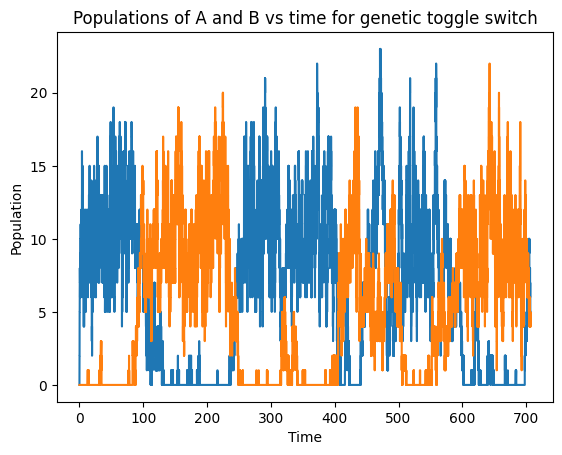

In [170]:
plot = plt.step(time_lst, state_lst[:, 0])
plot = plt.step(time_lst, state_lst[:, 3])
ylabel = plt.ylabel("Population")
xlabel = plt.xlabel("Time")
title = plt.title("Populations of A and B vs time for genetic toggle switch")

We can see that the populations of A and B stochastically switch between so-called "fixed points." Upon increasing the starting value for the populations of A and B alone, the system will quickly approach the same populations as in the case where we start from zero population (due to the death rate being proportional to population). 

Increasing the birth rate constant or decreasing the death rate constant significantly will cause the model to stop switching between fixed points over time, as the population of one protein will become large enough to keep the other gene in its inactive form constantly. In other words, the inactivation rate for one of the genes will become significantly larger than the activation rate, effectively stopping production of the corresponding protein altogether.

In [178]:
#reinitialize values

Ca = 0
Cga = 1
Cga_star = 0

Cb = 0
Cgb = 1
Cgb_star = 0

u1 = kd * Ca
u2 = kp * Cga
u3 = kf * Cga * Cb
u4 = kr * Cga_star

u5 = kd * Cb
u6 = kp * Cgb
u7 = kf * Cgb * Ca
u8 = kr * Cgb_star

usum = u1 + u2 + u3 + u4 + u5 + u6 + u7 + u8

pop_lst = [Ca, Cga, Cga_star, Cb, Cgb, Cgb_star]
prob_lst = [u1/usum, u2/usum, u3/usum, u4/usum, u5/usum, u6/usum, u7/usum, u8/usum, 0]

iterations = 10000
time = 0

time_lst = [0]
state_lst = np.array([[0, 0, 0, 0, 0, 0]])

In [179]:
for i in range(iterations):
    #Constraint commented out for demonstration
    #if pop_lst[2] == 1 and pop_lst[5] == 1:
    #    operator = op_lst[8]
    #else:
    
    #sample event using probabilities = prob_lst
    operator_id = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 8], p=prob_lst)
    operator = op_lst[operator_id]
    
    #update pop_lst
    pop_lst = apply_op(pop_lst, operator)
    
    #sample time to next event
    H = np.random.exponential(1/usum)
    time += H
    
    #update all rates, rate sum, and probability list
    #this could probably be made more efficient with conditionals, but also unreadable
    u1 = kd * pop_lst[0]
    u2 = kp * pop_lst[1]
    u3 = kf * pop_lst[1] * pop_lst[3]
    u4 = kr * pop_lst[2]

    u5 = kd * pop_lst[3]
    u6 = kp * pop_lst[4]
    u7 = kf * pop_lst[4] * pop_lst[0]
    u8 = kr * pop_lst[5]
    usum = u1 + u2 + u3 + u4 + u5 + u6 + u7 + u8
    prob_lst = [u1/usum, u2/usum, u3/usum, u4/usum, u5/usum, u6/usum, u7/usum, u8/usum, 0]
    
    #record data
    time_lst.append(time)
    state_lst = np.concatenate((state_lst, [pop_lst]))

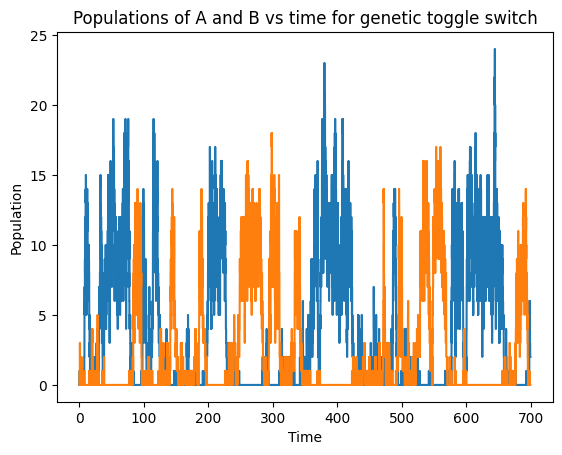

In [181]:
plot = plt.step(time_lst, state_lst[:, 0])
plot = plt.step(time_lst, state_lst[:, 3])
ylabel = plt.ylabel("Population")
xlabel = plt.xlabel("Time")
title = plt.title("Populations of A and B vs time for genetic toggle switch")

Upon relaxing the constraint that there can only be one inactive gene at a time, we see that there is a new fixed point where the populations of A and B are both low. This logically follows from the fact that we may now have two inactive genes at once. Since neither gene can be used to make its corresponding protein, both populations remain low until one of the genes becomes active again.